# Análisis Exhaustivo y Limpieza de Datos para Predicción de Churn
Este notebook realiza un análisis exploratorio, limpieza y preprocesamiento de datos utilizando el dataset de predicción de churn de clientes de Telco. El análisis abarca desde estadísticas descriptivas hasta la detección y manejo de datos inconsistentes, duplicados, nulos y valores atípicos. Finalmente, se prepara un dataset limpio para el modelado predictivo.

## Carga y Exploración Inicial
En esta sección se realiza la carga del dataset, inspección de sus primeras filas, y se obtienen estadísticas iniciales de las columnas numéricas y categóricas para entender la estructura de los datos.

In [1]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Ruta del archivo CSV
df = pd.read_csv(file_path)

# Inspeccionar las primeras filas
print("## Primeras filas del dataset:")
display(df.head())

# Información general del dataset
print("\n## Información general del dataset:")
df.info()

# Estadísticas descriptivas de las columnas numéricas
print("\n## Estadísticas descriptivas de las columnas numéricas:")
display(df.describe())

# Estadísticas descriptivas de las columnas categóricas
print("\n## Estadísticas descriptivas de las columnas categóricas:")
display(df.describe(include=['O']))

## Primeras filas del dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



## Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



## Estadísticas descriptivas de las columnas categóricas:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Verificación de Valores Faltantes y Duplicados
Se identifican columnas con valores nulos, filas duplicadas, y se evalúan las posibles acciones para tratar estos problemas.

In [2]:
# Identificar valores nulos
print("\n## Valores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print("\n## Número de filas duplicadas en el dataset:")
print(df.duplicated().sum())


## Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Número de filas duplicadas en el dataset:
0


## Exploración de Valores Únicos y Categóricos
Aquí se realiza un análisis detallado de la cantidad de valores únicos en cada columna y las categorías presentes en columnas categóricas.

In [12]:
# Resumen de valores únicos por columna
print("\n## Valores únicos por columna:")
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} valores únicos")

# Listar las categorías únicas para columnas categóricas
print("\n## Categorías únicas en columnas categóricas:")
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


## Valores únicos por columna:
customerID: 7043 valores únicos
gender: 2 valores únicos
SeniorCitizen: 2 valores únicos
Partner: 2 valores únicos
Dependents: 2 valores únicos
tenure: 73 valores únicos
PhoneService: 2 valores únicos
MultipleLines: 3 valores únicos
InternetService: 3 valores únicos
OnlineSecurity: 3 valores únicos
OnlineBackup: 3 valores únicos
DeviceProtection: 3 valores únicos
TechSupport: 3 valores únicos
StreamingTV: 3 valores únicos
StreamingMovies: 3 valores únicos
Contract: 3 valores únicos
PaperlessBilling: 2 valores únicos
PaymentMethod: 4 valores únicos
MonthlyCharges: 1585 valores únicos
TotalCharges: 6531 valores únicos
Churn: 2 valores únicos

## Categorías únicas en columnas categóricas:
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fibe

## Identificación y Manejo de Valores No Estándar
Se revisan las columnas categóricas para identificar valores no esperados, inconsistentes o con problemas (como espacios en blanco, caracteres especiales, etc.).

In [13]:
# Detectar valores no estándar en columnas categóricas
print("\n## Verificación de valores no estándar en columnas categóricas:")
for column in categorical_columns:
    non_standard_values = df[column].value_counts().index[
        df[column].value_counts().index.str.contains(r'^\s*$|[^a-zA-Z0-9\s]', regex=True)
    ]
    if len(non_standard_values) > 0:
        print(f"{column}: Valores no estándar -> {non_standard_values.tolist()}")


## Verificación de valores no estándar en columnas categóricas:
customerID: Valores no estándar -> ['7590-VHVEG', '3791-LGQCY', '6008-NAIXK', '5956-YHHRX', '5365-LLFYV', '5855-EIBDE', '8166-ZZTFS', '0129-KPTWJ', '9128-CPXKI', '9509-MPYOD', '0594-UFTUL', '0463-TXOAK', '0265-PSUAE', '7036-ZZKBD', '1928-BXYIV', '2832-SCUCO', '2988-GBIVW', '3647-GMGDH', '8024-XNAFQ', '0345-XMMUG', '6305-YLBMM', '9360-OMDZZ', '0504-HHAPI', '9965-YOKZB', '1986-PHGZF', '8218-FFJDS', '2956-GGUCQ', '5760-FXFVO', '3049-SOLAY', '0362-ZBZWJ', '7813-ZGGAW', '6522-OIQSX', '6119-SPUDB', '3154-HMWUU', '2192-CKRLV', '1541-ETJZO', '5073-RZGBK', '4274-OWWYO', '7581-EBBOU', '4211-MMAZN', '8979-CAMGB', '3556-BVQGL', '6595-COKXZ', '9356-AXGMP', '5176-OLSKT', '7508-DQAKK', '0016-QLJIS', '7544-ZVIKX', '7550-WIQVA', '5871-DGTXZ', '7816-VGHTO', '4007-NHVHI', '5181-OABFK', '0961-ZWLVI', '3006-XIMLN', '8443-WVPSS', '3011-WQKSZ', '1269-FOYWN', '7396-VJUZB', '5032-MIYKT', '5219-YIPTK', '5701-ZIKJE', '1230-QAJDW', '5458-CQJTA', '98

## Limpieza y Conversión de Columnas Problemáticas
Se realizan ajustes en las columnas con valores problemáticos o inconsistentes. Por ejemplo, la columna `TotalCharges` contiene valores que deben ser convertidos a numéricos.

In [14]:
# Limpieza de la columna 'TotalCharges'
if 'TotalCharges' in df.columns:
    print("\n## Limpieza de la columna 'TotalCharges'")
    print("Valores no estándar antes de la conversión:")
    print(df["TotalCharges"][~df["TotalCharges"].str.replace('.', '', 1, regex=False).str.isdigit()])

    # Convertir 'TotalCharges' a numérica
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    print("\n## Valores nulos en 'TotalCharges' después de la conversión:")
    print(df["TotalCharges"].isnull().sum())

    # Eliminar filas con valores nulos en 'TotalCharges'
    df = df.dropna(subset=["TotalCharges"])


## Limpieza de la columna 'TotalCharges'
Valores no estándar antes de la conversión:
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

## Valores nulos en 'TotalCharges' después de la conversión:
11


## Verificación Final del Dataset Limpio
Se revisa nuevamente la estructura del dataset tras las limpiezas realizadas, confirmando que los datos están preparados para análisis posteriores.

In [15]:
# Confirmar estructura tras la limpieza
print("\n## Información general después de la limpieza:")
df.info()

# Guardar dataset limpio
output_path = "dataset_limpio.csv"
df.to_csv(output_path, index=False)
print(f"\nDataset limpio guardado en: {output_path}")


## Información general después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16 

## Análisis Exploratorio de Datos (EDA)
Se realizan visualizaciones y análisis estadísticos avanzados para explorar patrones y relaciones entre las variables.

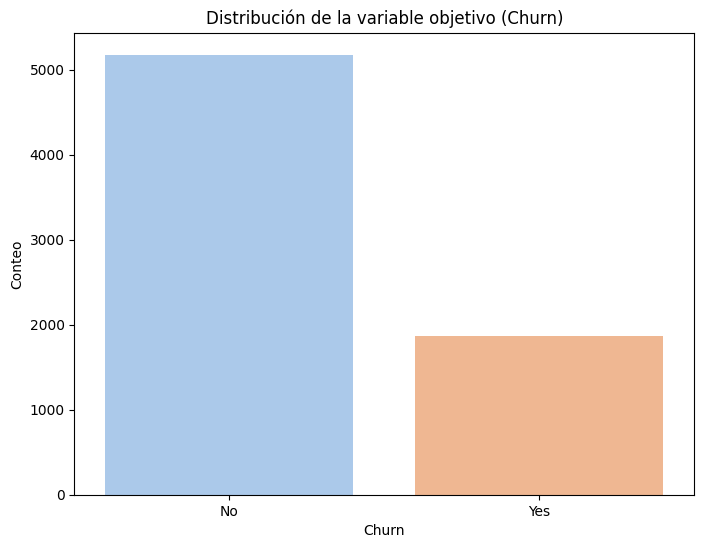

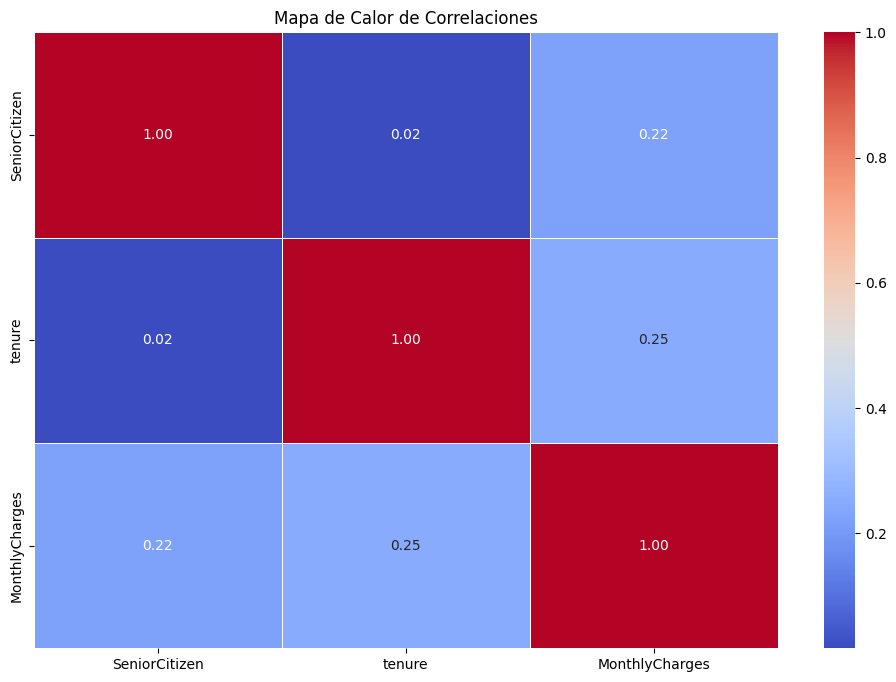

In [25]:
# Visualizar distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Churn", palette="pastel", hue="Churn", dodge=False, legend=False)
plt.title("Distribución de la variable objetivo (Churn)")
plt.xlabel("Churn")
plt.ylabel("Conteo")
plt.show()

# Análisis de correlaciones
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)  # Aseguramos que solo use variables numéricas
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

## Conclusión
El dataset ha sido limpiado y analizado. Está listo para proceder con las etapas de modelado y predicción. Se han eliminado inconsistencias, se manejaron valores nulos y no estándar, y se realizó un análisis exploratorio exhaustivo.

## Codificación de Variables Categóricas

En esta sección, se transforman las variables categóricas en valores numéricos utilizando técnicas de **One-Hot Encoding** y **Label Encoding**.  
Esto es necesario porque los algoritmos de Machine Learning requieren entradas numéricas para realizar cálculos.

### Pasos Realizados:
1. Identificar las variables categóricas.
2. Aplicar One-Hot Encoding a variables con múltiples categorías.
3. Aplicar Label Encoding a variables binarias (como 'Yes'/'No').

El resultado será un dataset listo para su uso en la fase de modelado.